In [1]:
import cv2 as cv
import numpy as np
import letter_recog
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv.imread('test3.jpg')

In [3]:
image

array([[[196, 196, 196],
        [ 78,  78,  78],
        [ 41,  41,  41],
        ...,
        [ 34,  34,  34],
        [ 61,  61,  61],
        [ 80,  80,  80]],

       [[ 77,  77,  77],
        [105, 105, 105],
        [157, 157, 157],
        ...,
        [157, 157, 157],
        [135, 135, 135],
        [ 72,  72,  72]],

       [[ 40,  40,  40],
        [157, 157, 157],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [197, 197, 197],
        [ 60,  60,  60]],

       ...,

       [[ 39,  39,  39],
        [160, 160, 160],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [201, 201, 201],
        [ 57,  57,  57]],

       [[ 66,  66,  66],
        [129, 129, 129],
        [200, 200, 200],
        ...,
        [201, 201, 201],
        [162, 162, 162],
        [ 71,  71,  71]],

       [[153, 153, 153],
        [ 76,  76,  76],
        [ 56,  56,  56],
        ...,
        [ 57,  57,  57],
        [ 71,  71,  71],
        [ 72,  72,  72]]

In [4]:
plt.imshow(image)

In [6]:
image.shape

(500, 500, 3)

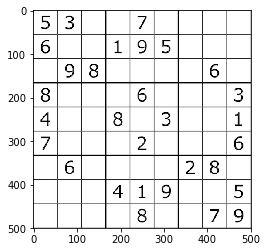

In [8]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [7]:
gray.shape

(500, 500)

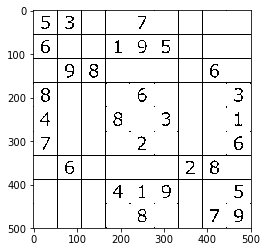

In [9]:
# gray = cv.GaussianBlur(gray, (11, 11), 0)
#thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
ret,thresh = cv.threshold(gray,128,255,cv.THRESH_BINARY)
#thresh = gray
plt.imshow(thresh, cmap='gray')

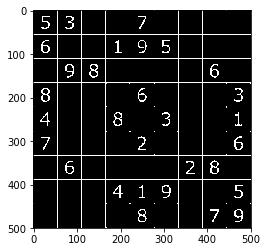

In [10]:
invImg = cv.bitwise_not(thresh)
plt.imshow(invImg, cmap='gray')

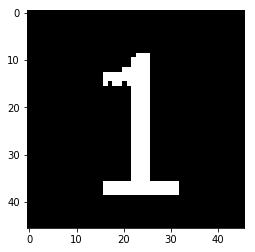

In [14]:
padding = 5
height, width, channels = image.shape
cellW = width/9
cellH = height/9
i = 1
j = 3
box = invImg[int(cellH*i + padding):int(cellH*(i+1) - padding), int(cellW*j + padding):int(cellW*(j+1) - padding)]
plt.imshow(box, cmap='gray')

In [15]:
img, contours, _ = cv.findContours(box, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours

[array([[[23,  9]],
 
        [[22, 10]],
 
        [[22, 11]],
 
        [[21, 12]],
 
        [[20, 12]],
 
        [[19, 13]],
 
        [[16, 13]],
 
        [[16, 15]],
 
        [[17, 14]],
 
        [[18, 15]],
 
        [[19, 15]],
 
        [[20, 14]],
 
        [[22, 16]],
 
        [[22, 35]],
 
        [[21, 36]],
 
        [[16, 36]],
 
        [[16, 38]],
 
        [[31, 38]],
 
        [[31, 36]],
 
        [[26, 36]],
 
        [[25, 35]],
 
        [[25,  9]]], dtype=int32)]

In [16]:
print(type(contours),len(contours))

<class 'list'> 1


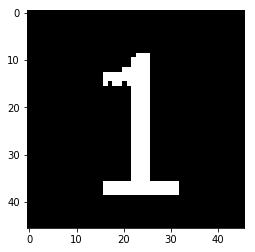

In [17]:
plt.imshow(box, cmap='gray')

In [18]:
[x,y,w,h] = cv.boundingRect(contours[0])
print(x,y,w,h)

16 9 16 30


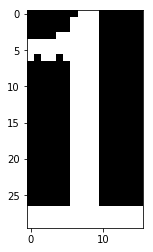

In [20]:
roi = box[y:y+h,x:x+w]
plt.imshow(roi, cmap='gray')

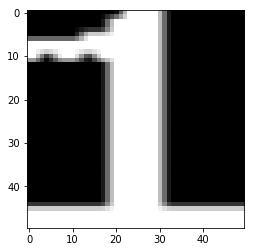

In [21]:
roi = cv.resize(roi,(50,50))
#roi = cv.flip(roi, 1)
plt.imshow(roi, cmap='gray')

In [45]:
roi.shape

(50, 50)

In [22]:
imgBoard = np.empty((0, 2500))
imgBoard = np.append(imgBoard, [roi.ravel()], axis=0)

In [23]:
imgBoard.shape

(1, 2500)

In [24]:
board = letter_recog.recogBoard(imgBoard)
#board = np.reshape(board, (-1, len(board)))
#board = np.vectorize(lambda t: 0 if t == 10 else t)(board)

In [25]:
print(board)

[1.]


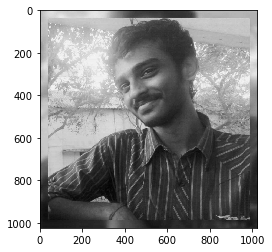

In [27]:
image = cv.imread('test5.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

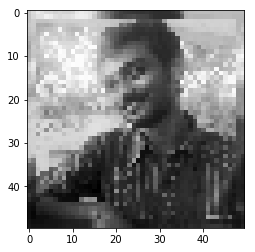

In [28]:
image = cv.resize(image,(50,50))
plt.imshow(image, cmap='gray')

In [29]:
imgBoard = np.empty((0, 2500))
imgBoard = np.append(imgBoard, [image.ravel()], axis=0)
board = letter_recog.recogBoard(imgBoard)
#board = np.reshape(board, (-1, len(board)))
#board = np.vectorize(lambda t: 0 if t == 10 else t)(board)
print(board)

[9.]


In [30]:
a = np.loadtxt("digits.data", np.int, delimiter=',')

In [31]:
a.shape

(77, 2501)

In [32]:
samples, responses = a[:,1:], a[:,0]

In [33]:
samples

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  89,   2,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]])

In [34]:
responses

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10,  1,  2,  3,  4,  5,  6,
        7,  8,  9,  1,  2,  3,  4,  5,  6,  7,  8,  9,  1,  2,  3,  4,  5,
        6,  7,  8,  9,  1,  2,  3,  4,  5,  7,  8,  9,  5,  6,  8,  9,  3,
        4,  6,  7,  8,  9,  1,  3,  9,  6,  7,  2,  6,  8,  1,  9,  5,  8,
        1,  2,  3,  4,  5,  7,  9,  1,  4])

In [41]:
img1 = samples[75]
img1.shape

(2500,)

In [42]:
img1 = img1.reshape((50,50))
img1.shape

(50, 50)

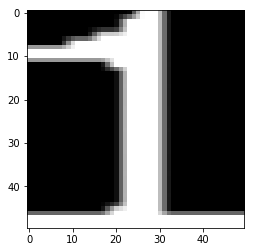

In [43]:
plt.imshow(img1,cmap="gray")